In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk


In [3]:
# Download stopwords jika belum ada
nltk.download('stopwords')

# Load data
df = pd.read_csv('spam.csv', encoding='latin-1')
print("Data shape:", df.shape)
print("\nFirst few rows:")
print(df.head())


Data shape: (5572, 5)

First few rows:
   id                                               Text Unnamed: 2  \
0   1  Go until jurong point, crazy.. Available only ...        NaN   
1   2                      Ok lar... Joking wif u oni...        NaN   
2   3  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   4  U dun say so early hor... U c already then say...        NaN   
4   5  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Data cleaning
# Hapus kolom kosong dan rename kolom
df = df.iloc[:, :2]  # Ambil hanya kolom id dan text
df.columns = ['id', 'text']
df = df.dropna()

print(f"\nData setelah cleaning: {df.shape}")

# Text preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words and len(word) > 2]
        return ' '.join(words)
    return ''



Data setelah cleaning: (5572, 2)


In [5]:
# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)
print(f"\nContoh teks setelah preprocessing: {df['cleaned_text'].iloc[0]}")



Contoh teks setelah preprocessing: jurong point crazy available bugis great world buffet cine got amore wat


In [6]:
# Feature extraction menggunakan TF-IDF
vectorizer = TfidfVectorizer(
    max_features=1000,
    min_df=2,
    max_df=0.8,
    stop_words='english',
    ngram_range=(1, 2)
)

X = vectorizer.fit_transform(df['cleaned_text'])
print(f"\nShape TF-IDF matrix: {X.shape}")



Shape TF-IDF matrix: (5572, 1000)


In [7]:
# Fungsi untuk evaluasi clustering
def evaluate_clustering(X, labels, algorithm_name):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X, labels)
        calinski = calinski_harabasz_score(X.toarray() if hasattr(X, 'toarray') else X, labels)
        davies = davies_bouldin_score(X.toarray() if hasattr(X, 'toarray') else X, labels)
    else:
        silhouette = calinski = davies = -1

    print(f"\n{algorithm_name} Evaluation:")
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Calinski-Harabasz Score: {calinski:.4f}")
    print(f"Davies-Bouldin Score: {davies:.4f}")
    return silhouette, calinski, davies



K-MEANS CLUSTERING

K-Means Evaluation:
Silhouette Score: 0.0201
Calinski-Harabasz Score: 36.0041
Davies-Bouldin Score: 7.1913


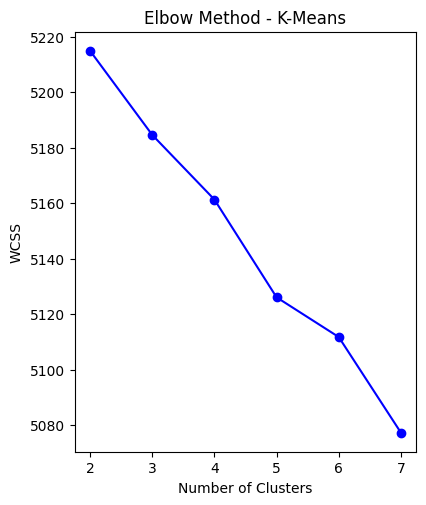

In [8]:
# 1. K-Means Clustering
print("\n" + "="*50)
print("K-MEANS CLUSTERING")
print("="*50)

# Menentukan jumlah cluster optimal menggunakan elbow method
wcss = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 12))

# Plot Elbow Method
plt.subplot(2, 3, 1)
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method - K-Means')

# Pilih k=3 berdasarkan elbow method
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
df['kmeans_cluster'] = kmeans_labels

# Evaluasi K-Means
kmeans_silhouette, kmeans_calinski, kmeans_davies = evaluate_clustering(X, kmeans_labels, "K-Means")


In [9]:
# 2. Hierarchical Clustering
print("\n" + "="*50)
print("HIERARCHICAL CLUSTERING")
print("="*50)

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X.toarray())
df['hierarchical_cluster'] = hierarchical_labels

# Evaluasi Hierarchical
hierarchical_silhouette, hierarchical_calinski, hierarchical_davies = evaluate_clustering(
    X, hierarchical_labels, "Hierarchical"
)



HIERARCHICAL CLUSTERING

Hierarchical Evaluation:
Silhouette Score: 0.0187
Calinski-Harabasz Score: 30.8304
Davies-Bouldin Score: 7.2308



DBSCAN CLUSTERING

DBSCAN Evaluation:
Silhouette Score: -0.1452
Calinski-Harabasz Score: 8.1761
Davies-Bouldin Score: 1.3963


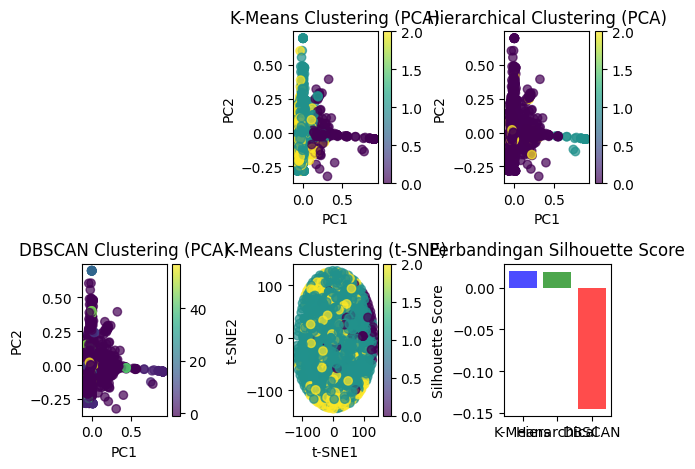


ANALISIS CLUSTER K-MEANS


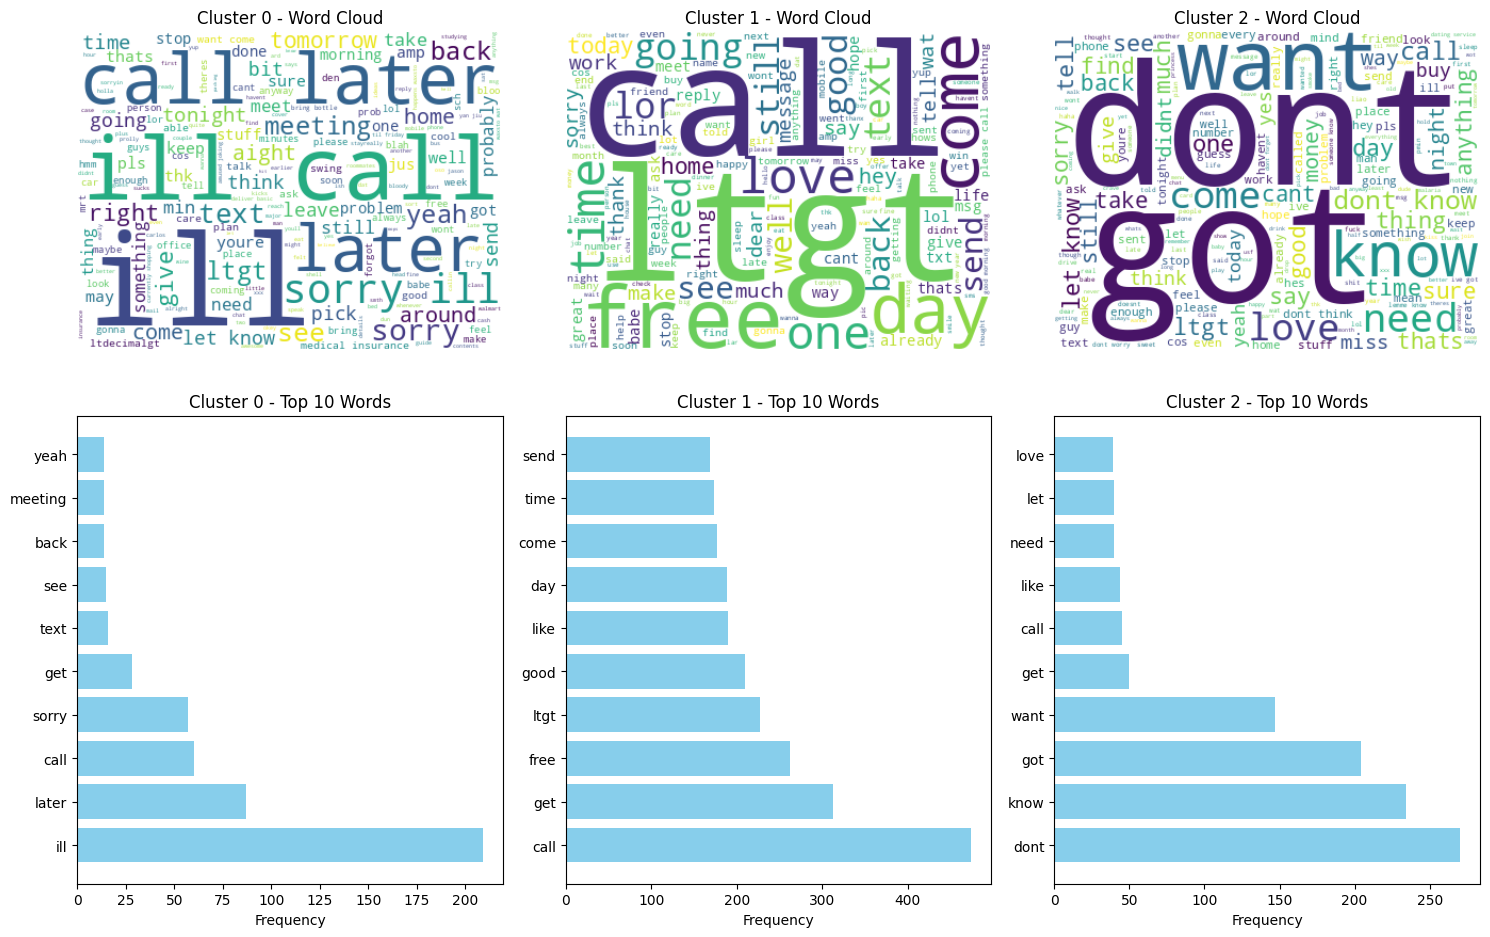


STATISTIK CLUSTER K-MEANS:

Cluster 0:
  Jumlah dokumen: 242
  Persentase: 4.34%
  Rata-rata panjang teks: 59.14 karakter
  Contoh teks: I'm back &amp; we're packing the car now, I'll let you know if there's room...

Cluster 1:
  Jumlah dokumen: 4654
  Persentase: 83.52%
  Rata-rata panjang teks: 78.84 karakter
  Contoh teks: Ok lar... Joking wif u oni......

Cluster 2:
  Jumlah dokumen: 676
  Persentase: 12.13%
  Rata-rata panjang teks: 96.42 karakter
  Contoh teks: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got a...

KARAKTERISTIK CLUSTER BERDASARKAN KATA KUNCI

Cluster 0 - Kata Kunci Teratas:
  ill: 0.3210
  later: 0.1627
  sorry: 0.1036
  ill later: 0.0890
  sorry ill: 0.0810
  meeting: 0.0318
  yeah: 0.0266
  ill text: 0.0242
  text: 0.0224
  ltgt: 0.0217

Cluster 1 - Kata Kunci Teratas:
  come: 0.0150
  ltgt: 0.0149
  like: 0.0149
  good: 0.0148
  going: 0.0136
  free: 0.0136
  time: 0.0129
  home: 0.0128
  lor: 0.0125
  send: 

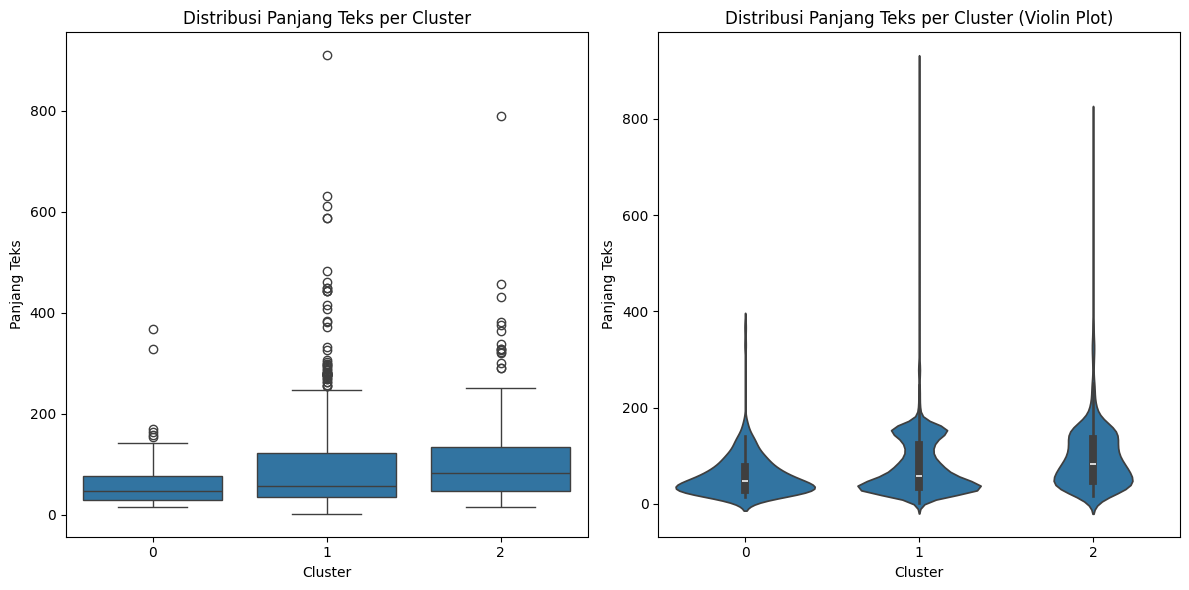


RINGKASAN HASIL CLUSTERING
Total dokumen: 5572
Jumlah fitur TF-IDF: 1000

Perbandingan Algoritma Clustering:
      Algorithm  Silhouette_Score  Calinski_Score  Davies_Score
0       K-Means            0.0201         36.0041        7.1913
1  Hierarchical            0.0187         30.8304        7.2308
2        DBSCAN           -0.1452          8.1761        1.3963

Rekomendasi: Algoritma K-Means memberikan hasil terbaik berdasarkan Silhouette Score

Hasil clustering disimpan ke 'clustering_results.csv'


In [11]:
# 3. DBSCAN Clustering
print("\n" + "="*50)
print("DBSCAN CLUSTERING")
print("="*50)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X.toarray())
df['dbscan_cluster'] = dbscan_labels

# Evaluasi DBSCAN
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette, dbscan_calinski, dbscan_davies = evaluate_clustering(
        X, dbscan_labels, "DBSCAN"
    )
else:
    dbscan_silhouette = dbscan_calinski = dbscan_davies = -1
    print("DBSCAN hanya menemukan 1 cluster")

# Visualisasi menggunakan PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

# Visualisasi menggunakan t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X.toarray())

# Plot hasil clustering
plt.subplot(2, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()

plt.subplot(2, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', alpha=0.7)
plt.title('Hierarchical Clustering (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()

plt.subplot(2, 3, 4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()

# Plot t-SNE
plt.subplot(2, 3, 5)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering (t-SNE)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.colorbar()

# Perbandingan metrik evaluasi
algorithms = ['K-Means', 'Hierarchical', 'DBSCAN']
silhouette_scores = [kmeans_silhouette, hierarchical_silhouette, dbscan_silhouette]

plt.subplot(2, 3, 6)
x_pos = np.arange(len(algorithms))
plt.bar(x_pos, silhouette_scores, color=['blue', 'green', 'red'], alpha=0.7)
plt.xticks(x_pos, algorithms)
plt.title('Perbandingan Silhouette Score')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Analisis cluster untuk K-Means (yang terbaik)
print("\n" + "="*50)
print("ANALISIS CLUSTER K-MEANS")
print("="*50)

# Word clouds untuk setiap cluster
plt.figure(figsize=(15, 10))

for cluster_id in range(3):
    # Ambil teks dari cluster tertentu
    cluster_texts = df[df['kmeans_cluster'] == cluster_id]['cleaned_text']
    all_text = ' '.join(cluster_texts)

    # Buat word cloud
    plt.subplot(2, 3, cluster_id + 1)
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate(all_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {cluster_id} - Word Cloud')
    plt.axis('off')

    # Analisis kata paling umum
    plt.subplot(2, 3, cluster_id + 4)
    words = all_text.split()
    common_words = Counter(words).most_common(10)
    words, counts = zip(*common_words)

    plt.barh(words, counts, color='skyblue')
    plt.title(f'Cluster {cluster_id} - Top 10 Words')
    plt.xlabel('Frequency')

plt.tight_layout()
plt.show()

# Statistik cluster
print("\nSTATISTIK CLUSTER K-MEANS:")
cluster_stats = df['kmeans_cluster'].value_counts().sort_index()
for cluster_id, count in cluster_stats.items():
    cluster_texts = df[df['kmeans_cluster'] == cluster_id]['text']
    avg_length = cluster_texts.str.len().mean()

    print(f"\nCluster {cluster_id}:")
    print(f"  Jumlah dokumen: {count}")
    print(f"  Persentase: {(count/len(df))*100:.2f}%")
    print(f"  Rata-rata panjang teks: {avg_length:.2f} karakter")

    # Contoh dokumen dari setiap cluster
    sample_text = cluster_texts.iloc[0] if len(cluster_texts) > 0 else "No text"
    print(f"  Contoh teks: {sample_text[:100]}...")

# Analisis karakteristik setiap cluster berdasarkan kata kunci
print("\n" + "="*50)
print("KARAKTERISTIK CLUSTER BERDASARKAN KATA KUNCI")
print("="*50)

# Dapatkan fitur TF-IDF
feature_names = vectorizer.get_feature_names_out()

for cluster_id in range(3):
    print(f"\nCluster {cluster_id} - Kata Kunci Teratas:")

    # Dapatkan centroid cluster
    centroid = kmeans.cluster_centers_[cluster_id]

    # Urutkan fitur berdasarkan importance
    top_indices = centroid.argsort()[-10:][::-1]
    top_features = [feature_names[i] for i in top_indices]
    top_scores = [centroid[i] for i in top_indices]

    for feature, score in zip(top_features, top_scores):
        print(f"  {feature}: {score:.4f}")

# Visualisasi distribusi panjang teks per cluster
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['text_length'] = df['text'].str.len()
sns.boxplot(data=df, x='kmeans_cluster', y='text_length')
plt.title('Distribusi Panjang Teks per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Panjang Teks')

plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='kmeans_cluster', y='text_length')
plt.title('Distribusi Panjang Teks per Cluster (Violin Plot)')
plt.xlabel('Cluster')
plt.ylabel('Panjang Teks')

plt.tight_layout()
plt.show()

# Ringkasan hasil
print("\n" + "="*50)
print("RINGKASAN HASIL CLUSTERING")
print("="*50)

print(f"Total dokumen: {len(df)}")
print(f"Jumlah fitur TF-IDF: {X.shape[1]}")

results_df = pd.DataFrame({
    'Algorithm': ['K-Means', 'Hierarchical', 'DBSCAN'],
    'Silhouette_Score': [kmeans_silhouette, hierarchical_silhouette, dbscan_silhouette],
    'Calinski_Score': [kmeans_calinski, hierarchical_calinski, dbscan_calinski],
    'Davies_Score': [kmeans_davies, hierarchical_davies, dbscan_davies]
})

print("\nPerbandingan Algoritma Clustering:")
print(results_df.round(4))

# Rekomendasi berdasarkan analisis
best_algorithm = results_df.loc[results_df['Silhouette_Score'].idxmax(), 'Algorithm']
print(f"\nRekomendasi: Algoritma {best_algorithm} memberikan hasil terbaik berdasarkan Silhouette Score")

# Simpan hasil clustering
df[['id', 'text', 'kmeans_cluster', 'hierarchical_cluster', 'dbscan_cluster']].to_csv('clustering_results.csv', index=False)
print("\nHasil clustering disimpan ke 'clustering_results.csv'")